In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline


In [8]:
df = pd.read_csv('bank-full.csv', sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 45211 rows and 17 columns.


In [10]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = le.fit_transform(df[column])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
X = df.drop(columns=["y"])  
y = df["y"]                 

print("Feature variables (X):", X.shape)
print("Target variable (y):", y.shape)


Feature variables (X): (45211, 16)
Target variable (y): (45211,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 36168 samples
Testing set: 9043 samples


In [17]:
print("Class Distribution in Training Set:")
print(y_train.value_counts())


Class Distribution in Training Set:
y
0    31970
1     4198
Name: count, dtype: int64


In [19]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("New Class Distribution After SMOTE:")
print(y_train_balanced.value_counts())


New Class Distribution After SMOTE:
y
0    31970
1    31970
Name: count, dtype: int64


In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

print("Model retrained with balanced data!")



Model retrained with balanced data!


In [29]:
y_pred = model.predict(X_test)
print("New Sample Predictions:", y_pred[:10])


New Sample Predictions: [0 0 0 1 0 1 0 0 0 1]


In [30]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"New Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


New Model Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      7952
           1       0.41      0.77      0.53      1091

    accuracy                           0.84      9043
   macro avg       0.69      0.81      0.72      9043
weighted avg       0.90      0.84      0.86      9043



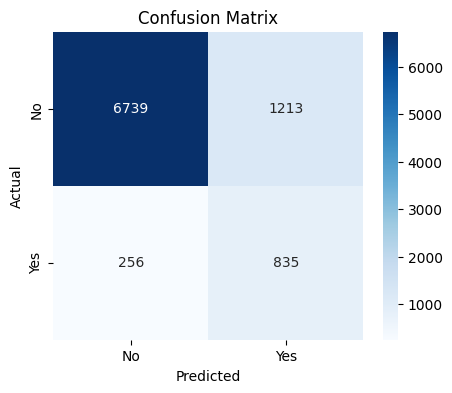

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
